In [154]:
%matplotlib inline
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
from sklearn import svm
import numpy as np
import math
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from numpy import isnan
from pandas import DataFrame
from sklearn.impute import KNNImputer
import imblearn
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [155]:
# load the data
adni_df = pd.read_csv('D:/PM/ADNI_EDA/data/ADNIMERGE.csv')


Labelling

In [156]:
encoders = dict()
for col_name in adni_df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(adni_df[col_name].astype(str))
    adni_df[col_name] = adni_df[col_name].map(lambda x: le.transform([x])[0] if type(x)==str else x)
    encoders[col_name] = le

In [157]:
encoders['DX'].classes_

array(['CN', 'Dementia', 'MCI', 'nan'], dtype=object)

In [158]:
#Y=adni_df.DX
X=adni_df.copy()
X=X.drop('DX',axis='columns')
X=X.drop('DX_bl',axis='columns')

FirstLevelClasses = adni_df.DX.unique()
FirstLevelClasses_Dictionary = dict(zip(FirstLevelClasses, range(len(FirstLevelClasses))))
First_df=adni_df.replace(FirstLevelClasses_Dictionary)
Y=First_df.DX
X = X.loc[Y != 3]
Y = Y.loc[Y != 3]


Standardization

In [159]:

trans = StandardScaler()
data = trans.fit_transform(X)
dataset = DataFrame(data)
dataset.columns = X.columns
dataset.index = Y.index
dataset['DX']=Y

Imputation

In [160]:
imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')
imputer.fit(dataset)
imputed = imputer.transform(dataset)
imputed=DataFrame(imputed)
imputed.columns = dataset.columns


In [161]:
Y=imputed.DX
X=imputed.copy()
X=X.drop('DX',axis='columns')




In [162]:

oversample =SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [163]:
X_new=X

In [164]:
train_X, val_X, train_y, val_y = train_test_split(X_new, Y,random_state = 0)

Ensembling


In [172]:

#create a new random forest classifier
rf1 = RandomForestClassifier()
rf2 = RandomForestClassifier()


In [173]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[ ('rf1', rf1), ('rf2', rf2)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [174]:
ensemble.fit(train_X, train_y)
#test our model on the test data
ensemble.score(val_X,val_y)

0.9397222222222222

In [175]:
val_y=val_y.astype(int)
preds = ensemble.predict(val_X)
preds=preds.astype(int)
accuracy_score(val_y, preds)

0.9397222222222222

In [176]:
def compute_feature_importance(voting_clf, weights):
    """ Function to compute feature importance of Voting Classifier """
    
    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [187]:
df = pd.DataFrame(columns=list(X.columns))

df.loc[0]=compute_feature_importance(ensemble, [1, 1])




<AxesSubplot:>

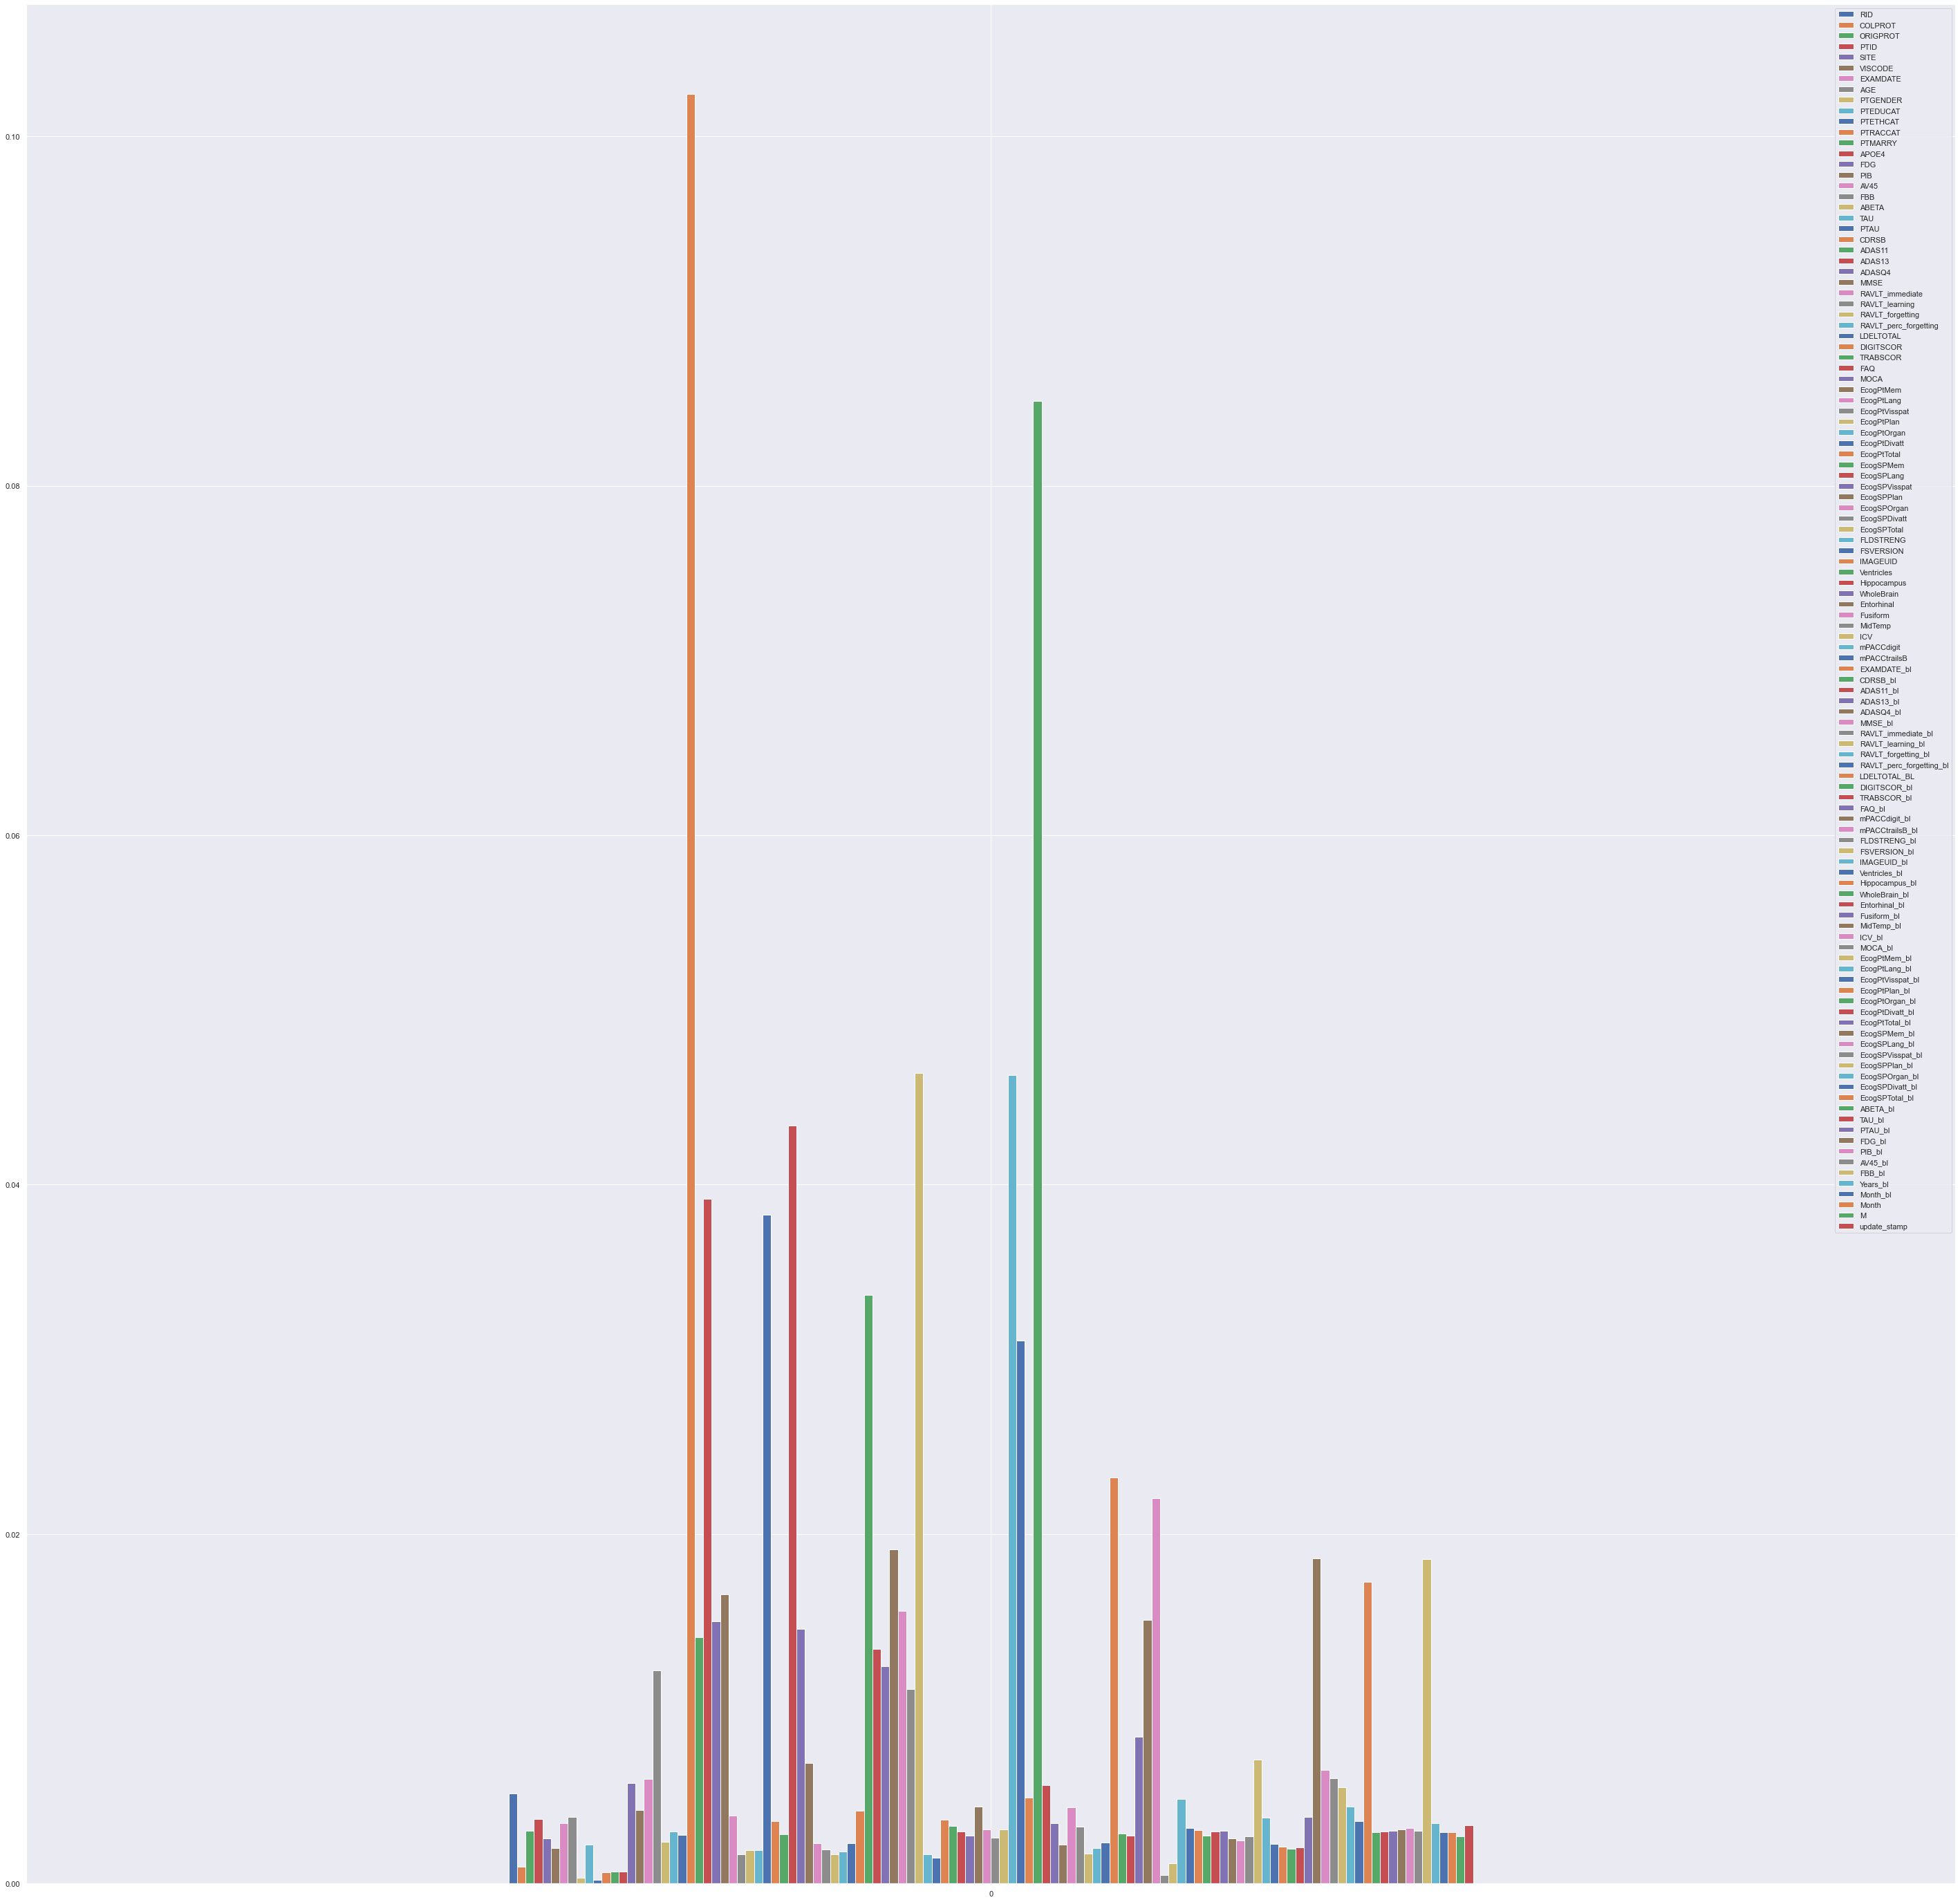

In [198]:

df.plot.bar(figsize=(50,50))

Second Level

In [199]:
Second_df = adni_df.loc[adni_df.DX == 2]

In [200]:
Second_df['DX_bl'].unique()


array([3., 4., 0., 1., 2.])

In [201]:
Y=Second_df.DX_bl
X=Second_df.copy()
X=X.drop('DX',axis='columns')
X=X.drop('DX_bl',axis='columns')

In [202]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
trans = StandardScaler()
data = trans.fit_transform(X)
dataset = DataFrame(data)
dataset.columns = X.columns
dataset.index = Y.index
dataset['DX_bl']=Y

In [203]:
imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')
imputer.fit(dataset)
imputed = imputer.transform(dataset)
imputed=DataFrame(imputed)
imputed.columns = dataset.columns

In [204]:
Y=imputed.DX_bl
X=imputed.copy()
X=X.drop('DX_bl',axis='columns')
from imblearn.over_sampling import SMOTE
oversample =SMOTE()
X, Y = oversample.fit_resample(X, Y)
X_new=X

In [205]:
train_X, val_X, train_y, val_y = train_test_split(X_new, Y,random_state = 0)

In [206]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models

#create our voting classifier, inputting our models
ensemble2 = VotingClassifier(estimators, voting='hard')

In [207]:
ensemble2.fit(train_X, train_y)
#test our model on the test data
ensemble2.score(val_X,val_y)

0.994661921708185

In [210]:
df2 = pd.DataFrame(columns=list(X.columns))

df2.loc[0]=compute_feature_importance(ensemble2, [1, 1])

<AxesSubplot:>

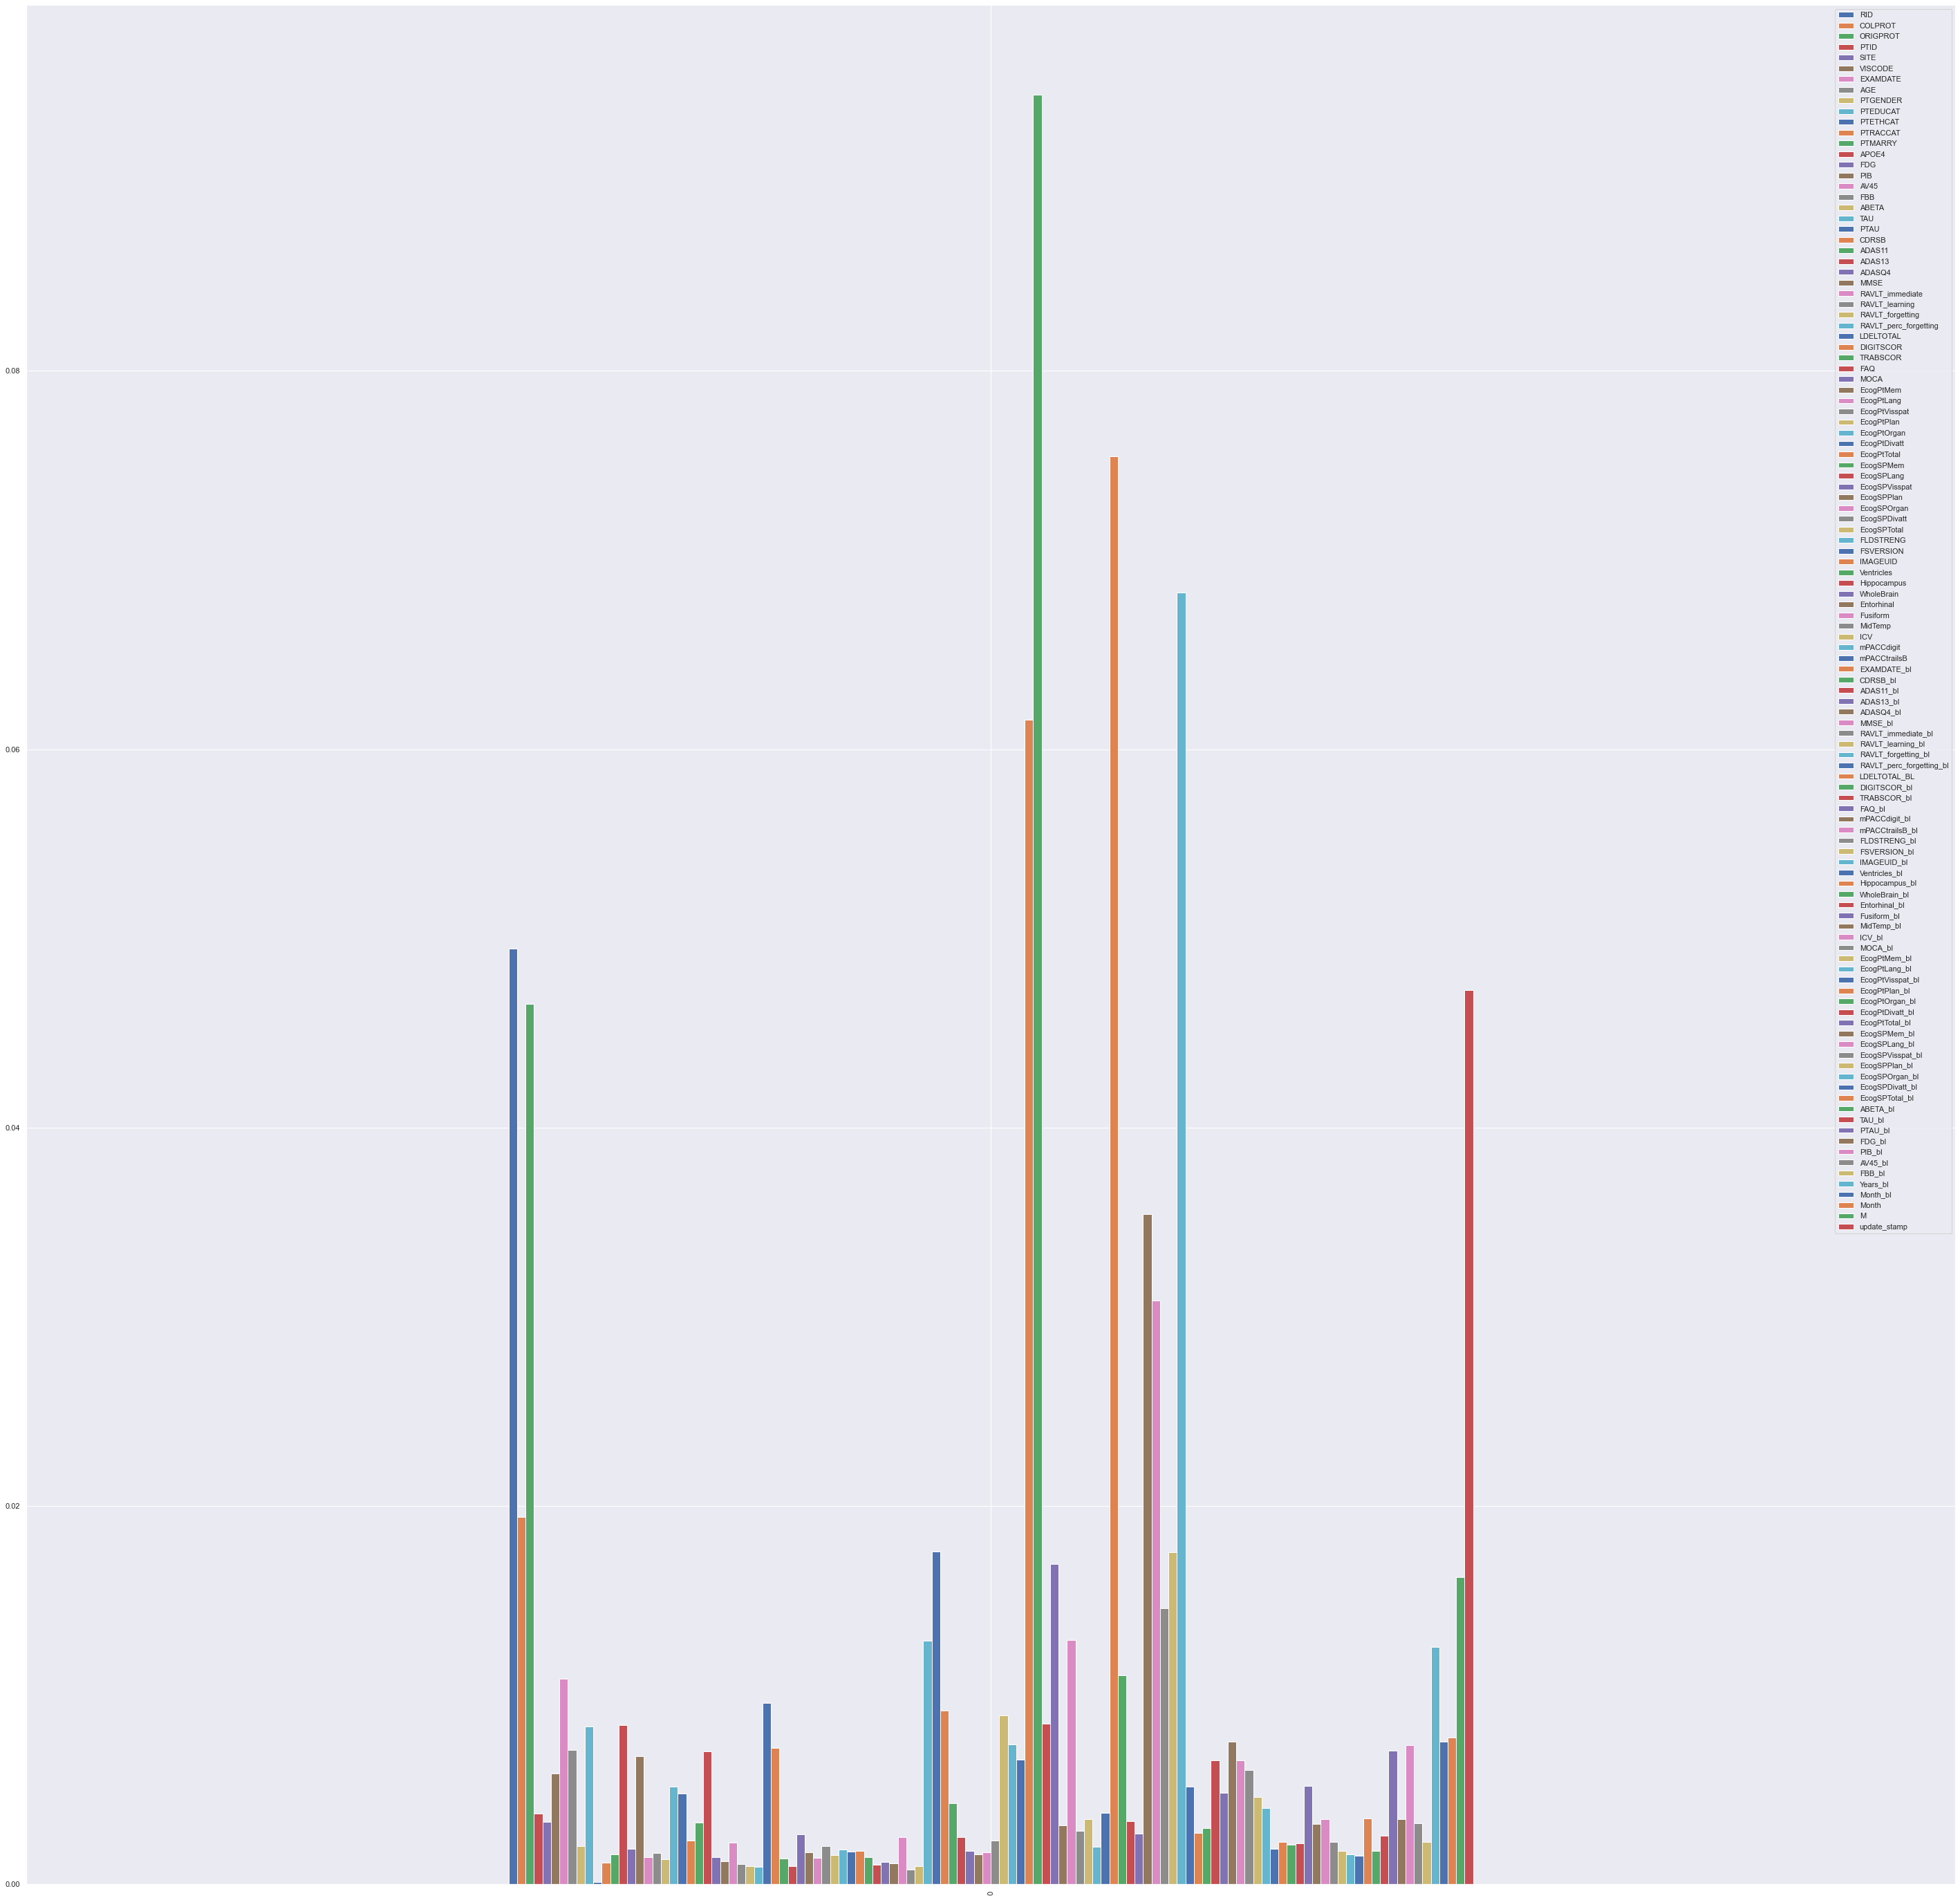

In [211]:
df2.plot.bar(figsize=(50,50))